In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest, RFECV
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
#from xgboost.sklearn import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sn
#import keras
#from keras.models import Sequential
#from keras.layers import Dense, BatchNormalization, Dropout
#from keras import regularizers

import warnings; warnings.simplefilter('ignore')
%matplotlib inline

# Data Preprocessing
Introduce the Data¶

Task: Given EEG series, predict wheiter they have Epileptic-Seizure or not

In [39]:
df = pd.read_csv('data.csv')

df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [53]:
cols = df.columns
outcome = df.y
outcome[outcome>1]=0
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


The number of trials for the non-seizure class is: 9200
The number of trials for the seizure class is: 2300


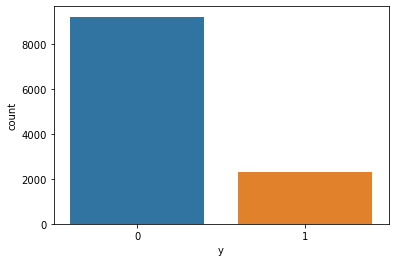

In [54]:
ax = sn.countplot(outcome,label="Count")
non_seizure, seizure = outcome.value_counts()
print('The number of trials for the non-seizure class is:', non_seizure)
print('The number of trials for the seizure class is:', seizure)

In [40]:
X = df.iloc[:,1:179].values
X.shape

(11500, 178)

In [47]:
y = df.iloc[:,179].values
y

array([0, 1, 0, ..., 0, 0, 0])

# Basic data cleaning
A. Dealing with data types

    -Numeric, e.g. income, age
    -Categorical, e.g. gender, nationality
    -Ordinal, e.g. low/medium/high
    
-Models can only handle numeric features

-Must convert categorical and ordinal features into numeric features

    -Create dummy features
    -Transform a categorical feature into a set of dummy features, each representing a unique category
    -In the set of dummy features, 1 indicates that the observation belongs to that category

# 
B. Handling missing data
-Models can not handle missing data

-Simplest solution

    Remove observations/features that have missing data
-But, removing missing data can introduce a lot of issues

    Data is randomly missing: potentially lose a lot of your data
    Data is non-randomly missing: in addition to losing data, you are also introducing potential biases
    Usually, this is a poor solution

-An alternative solution is to use imputation
    
    Replace missing value with another value
    Strategies: mean, median, highest frequency value of given feature

# More Data Exploration

A. Outlier detection

B. Distribution of Features

# Feature Engineering

A. Interactions amongst features¶

B. Dimensionality reduction using PCA

# Feature election and model building


Build model using processed data

Build model using unprocessed data

   ## Splitting the dataset into the Training set and Test set

In [50]:
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)